In [1]:
import pynbody
import simulation
import numpy as np
import matplotlib.pylab as plt

loading simulation: 69002_p200.0_a600.0_r600.0_c8.15_z0
No sumfile found


[22, 30, 65, 78]


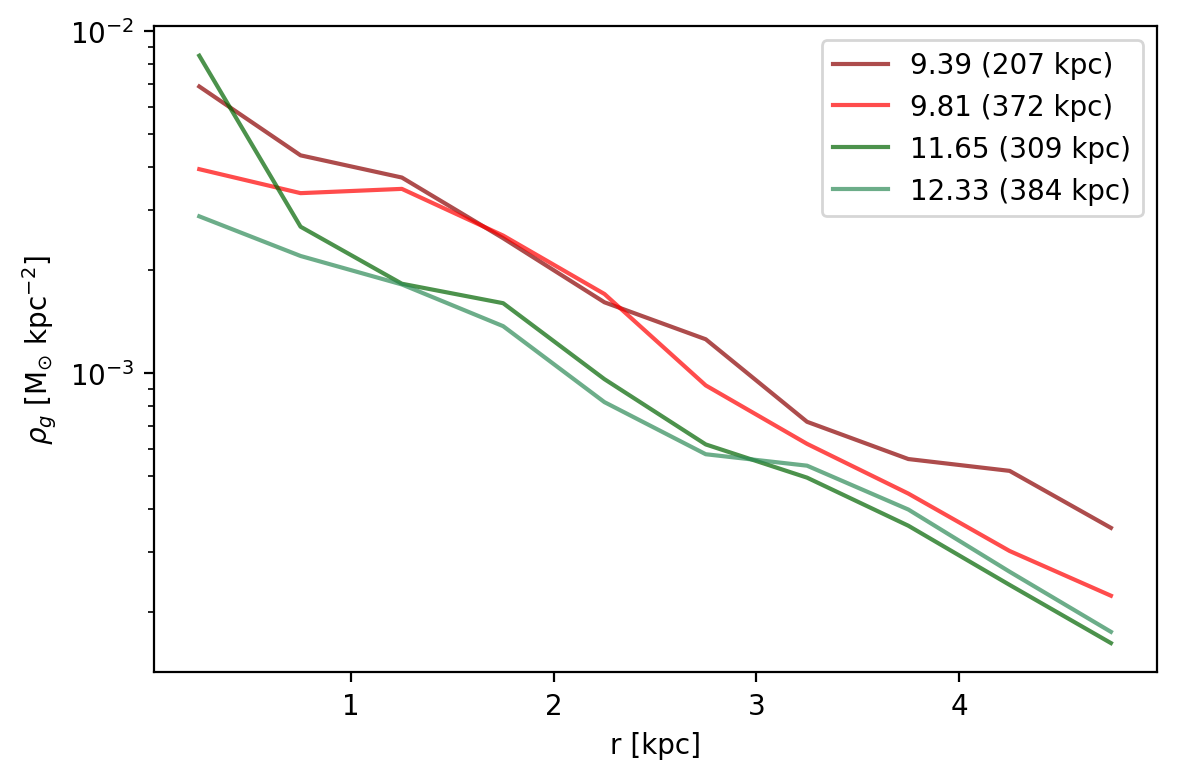

In [5]:
sim = simulation.MoriaSim('69002_p200.0_a600.0_r600.0_c8.15_z0', kicked=True)
fig, ax = plt.subplots(1, figsize=(6,4), dpi=200)
nbins = 10
snap_list = range(20, len(sim), 20)
# snap_list = [18, 36, 62, 81]
# snap_list = [22, 33, 65, 78]  # 
snap_list = [22, 30, 65, 78]
colors = ['darkred', 'red', 'darkgreen', 'seagreen']
print(list(snap_list))
rho = list()
cmap = [plt.cm.summer] *2 + [plt.cm.hot] *2
for j,i in enumerate(snap_list):
    snap = sim[i]
    r = pynbody.analysis.halo.center(snap, retcen=True)
#     pynbody.analysis.angmom.faceon(snap)
    #     print(pynbody.analysis.halo.virial_radius(snap))
    r = np.linalg.norm(r)
#     pynbody.analysis.halo.center(snap, retcen=True)
    sim.center(i)
#     pynbody.analysis.angmom.faceon(snap)


    # create a profile object for the stars (by default this is a 2D profile)
    p = pynbody.analysis.profile.Profile(snap.g, min=0, nbins=10, max=5)

#     # make the figure and sub plots
#     fig, ax = plt.subplots(1,2,figsize=(6,6), dpi=200)
    snap_time_gyr = snap.properties['time'].in_units("Gyr")
    rho.append(p['density'])
    # make the plot
#   color =  cmap[j]((snap_time_gyr-9.3+j)/12.5)
    ax.plot(p['rbins'], p['density'], color=colors[j], alpha=.7, label="{:4.2f} ({:3.0f} kpc)".format(snap_time_gyr, r))
    ax.semilogy()
    ax.set_xlabel('r [kpc]')
#     ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')
    ax.set_ylabel(r'$\rho_{g}$ [M$_{\odot}$ kpc$^{-2}$]')
    ax.legend()
fig.tight_layout()
# p1 = pynbody.analysis.profile.Profile(sim[1].s, min=0,  max=50)
# ax.plot(p1['rbins'], p1['density'])

In [6]:
sim2 = simulation.MoriaSim('69002_p400.0_a600.0_r600.0_c8.15_z0', kicked=True)
sim3 = simulation.MoriaSim('69002_p598.0_a600.0_r600.0_c8.15_z0', kicked=True)


loading simulation: 69002_p400.0_a600.0_r600.0_c8.15_z0
No sumfile found
loading simulation: 69002_p598.0_a600.0_r600.0_c8.15_z0
No sumfile found


In [5]:
%matplotlib ipympl
nbins = 10
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.array(snap_list) #range(0, len(sim), 2)
Y = p['rbins']
X, Y = np.meshgrid(X, Y)
Z = np.array(rho).T
print(X.shape, Y.shape, Z.shape)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis,
                       linewidth=0,
                       antialiased=False, alpha=0.8)

FigureCanvasNbAgg()

(10, 4) (10, 4) (10, 4)


In [4]:
# sim = simulation.MoriaSim('69002_p598.0_a600.0_r600.0_c8.15_z0', kicked=True)

loading simulation: 69002_p598.0_a600.0_r600.0_c8.15_z0
No sumfile found


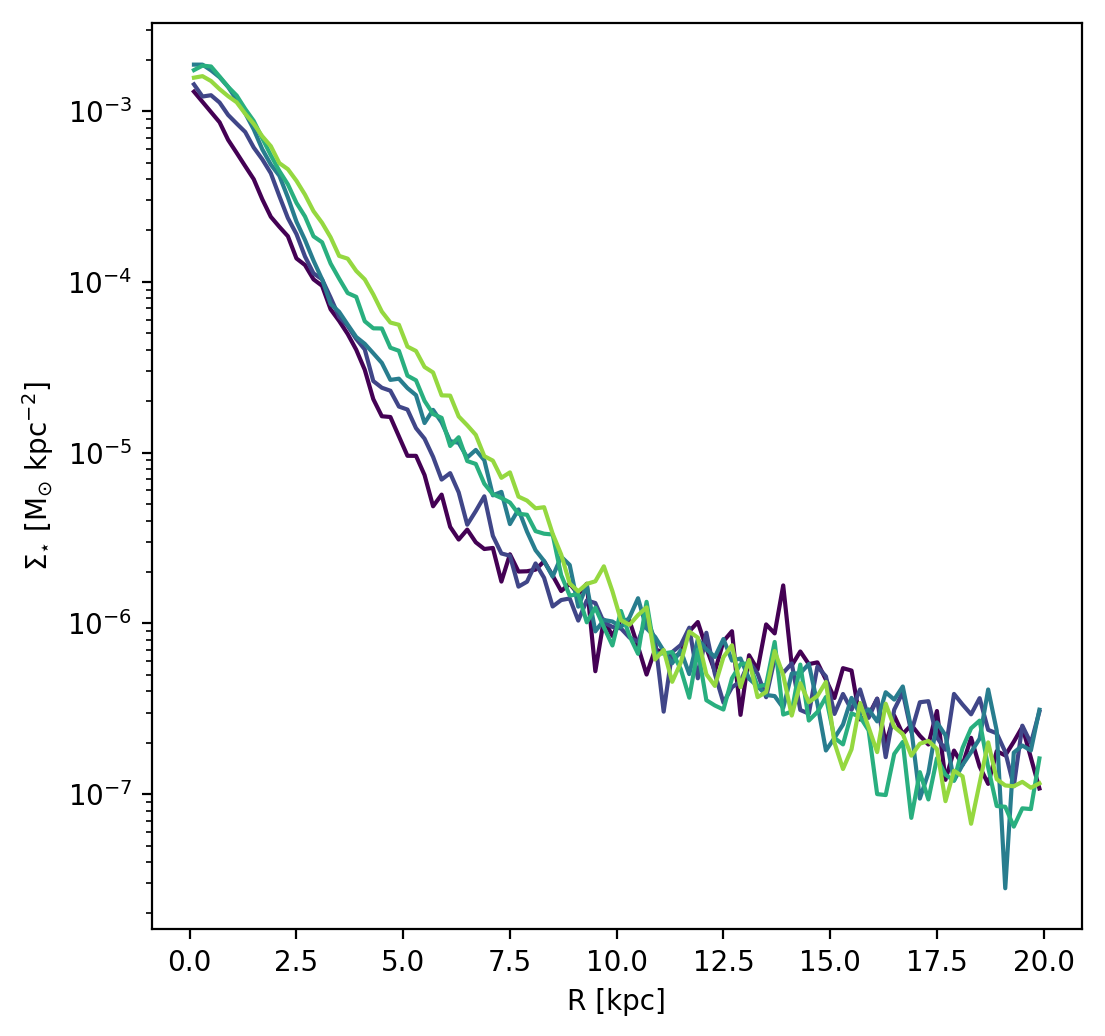

In [12]:
fig, ax = plt.subplots(1,figsize=(6,6), dpi=200)
for i in range(0, len(sim), 20):
    sim.center(i)
    snap = sim[i]
#     pynbody.analysis.halo.center(snap.s)

    # create a profile object for the stars (by default this is a 2D profile)
    p = pynbody.analysis.profile.Profile(snap.s, min=0,  max=20)

#     # make the figure and sub plots
#     fig, ax = plt.subplots(1,2,figsize=(12,6), dpi=200)

    # make the plot
    ax.plot(p['rbins'],p['density'], color=plt.cm.viridis(i/len(sim)))
    ax.semilogy()
    ax.set_xlabel('R [kpc]')
    ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# p1 = pynbody.analysis.profile.Profile(sim[1].s, min=0,  max=50)
# ax.plot(p1['rbins'], p1['density'])

In [3]:
# p = pynbody.analysis.profile.VerticalProfile(sim[0], rmin=0, rmax=50, zmax=100, ndim=2)

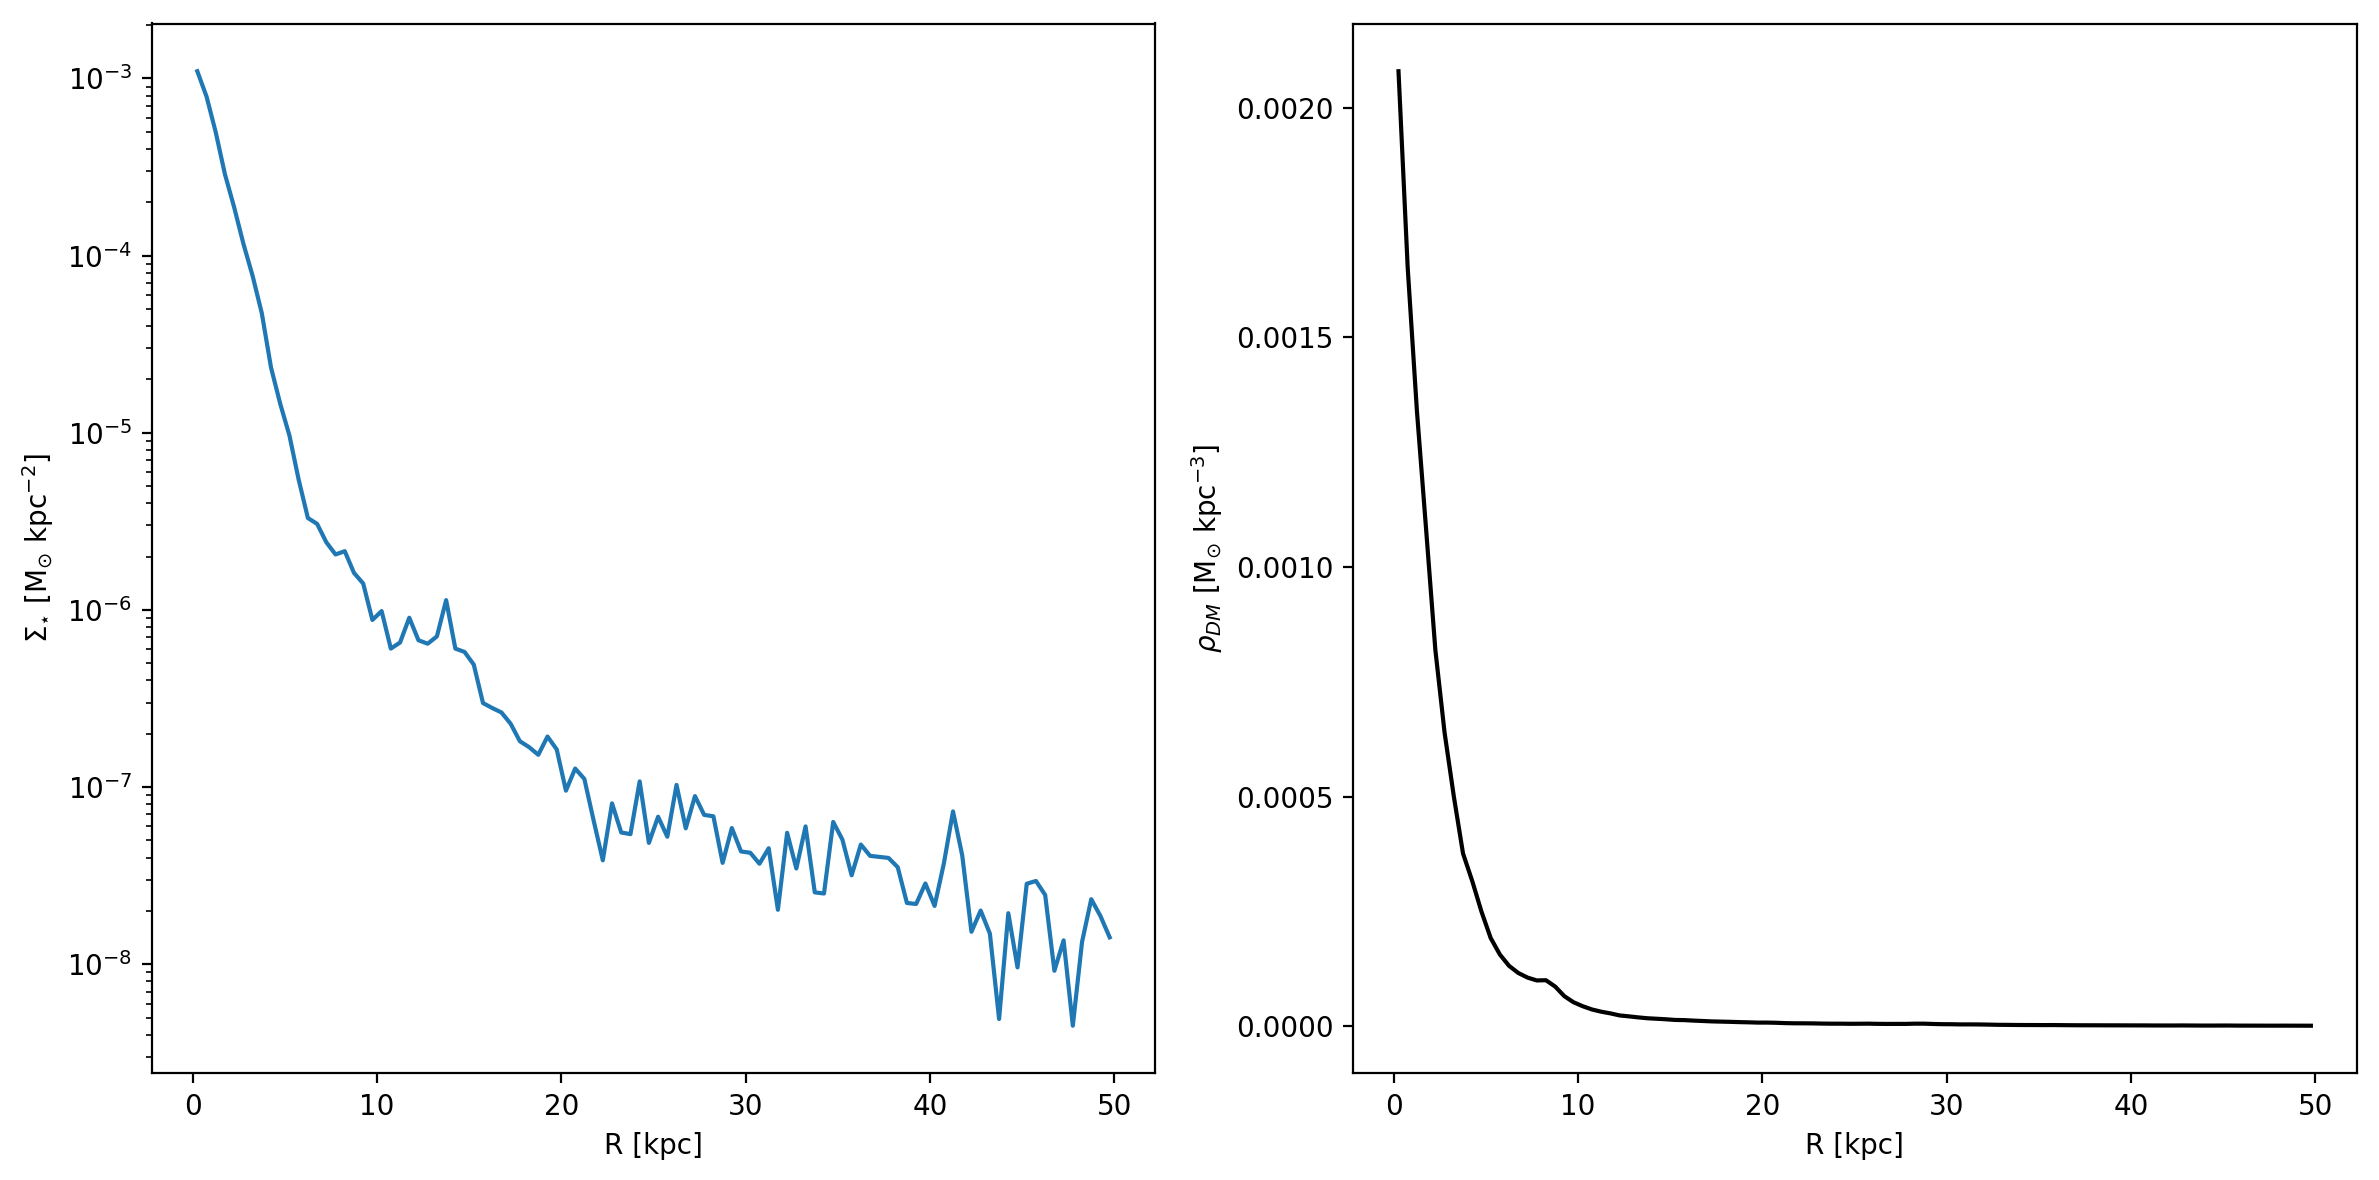

In [40]:
i = 0
snap = sim[i]
pynbody.analysis.halo.center(snap)
# create a profile object for the stars (by default this is a 2D profile)
p = pynbody.analysis.profile.Profile(sim[0].s, min =0,  max = 50)

# make the figure and sub plots
fig, ax = plt.subplots(1,2,figsize=(6,6), dpi=200)

# make the plot
ax[0].plot(p['rbins'],p['density'])
ax[0].semilogy()
ax[0].set_xlabel('R [kpc]')
ax[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(sim[0].d,min=.01,max=50,ndim=3)

ax[1].plot(p['rbins'],p['density'], 'k')
# ax[1].semilogy()
ax[1].set_xlabel('R [kpc]')
ax[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')
fig.tight_layout()